In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry_convert as pc
from scipy.stats import iqr
import pycountry
import pycountry_convert as pc
from datetime import datetime
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.dates as mdates

## Loading data

In [7]:
df_historical = pd.read_csv('data/2018-2019linreg_allAircrafts_newdrop.csv')

In [8]:
df2020 = pd.read_csv('data/2020linreg_allAircrafts_2.csv')

## Data distribution in the years 2018-2020

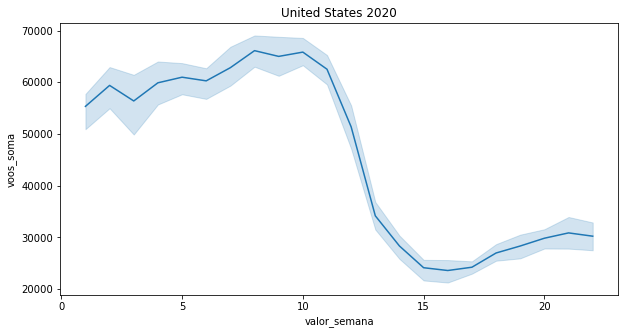

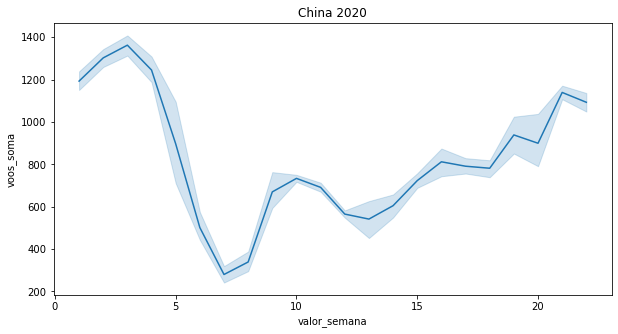

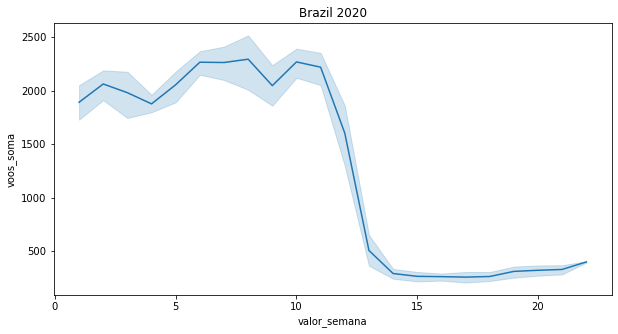

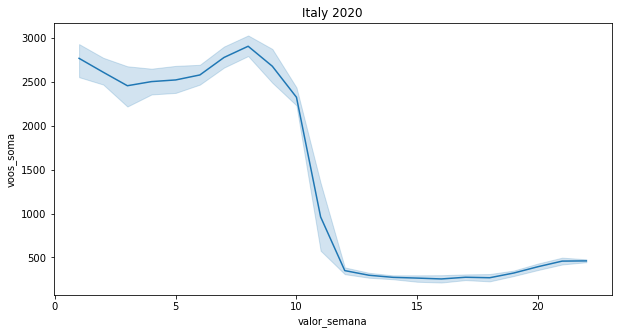

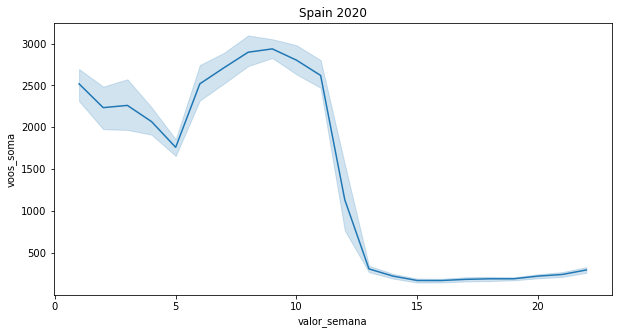

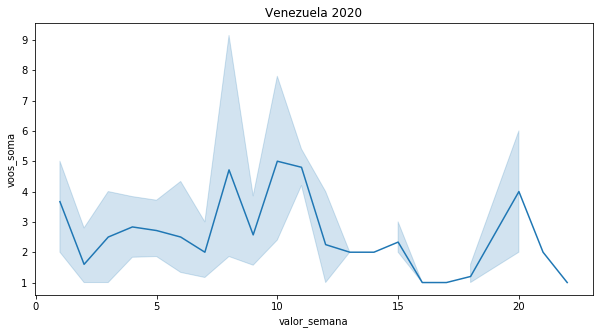

In [9]:
countries = ['United States', 'China', 'Brazil', 'Italy', 'Spain', 'Venezuela']

df2020 = pd.read_csv('data/2020linreg_allAircrafts_2.csv')

for c in countries:
    plots2020 = df2020[(df2020.pais == c)]
    ax = sns.lineplot(y = plots2020.voos_soma, x= plots2020.valor_semana)
    plt.title(str(c) + ' 2020')
    plt.show()

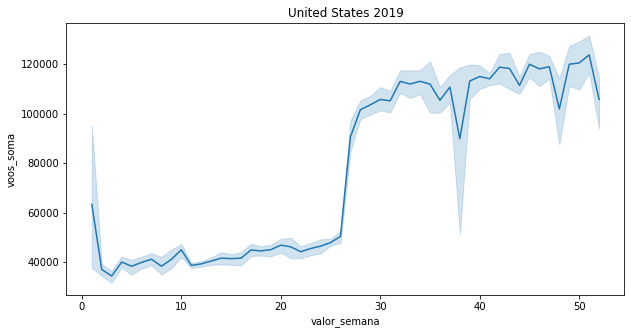

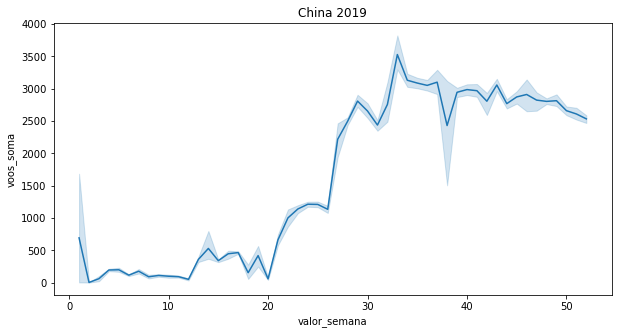

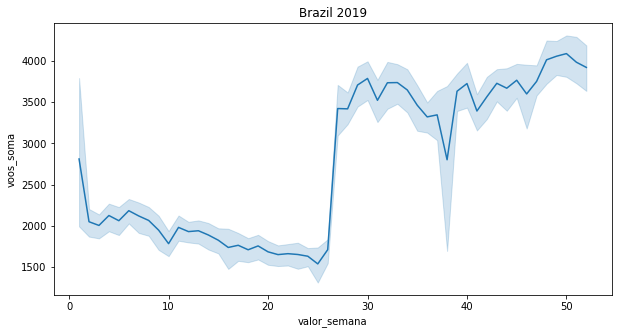

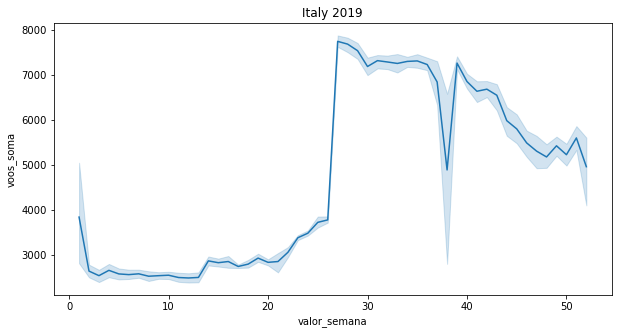

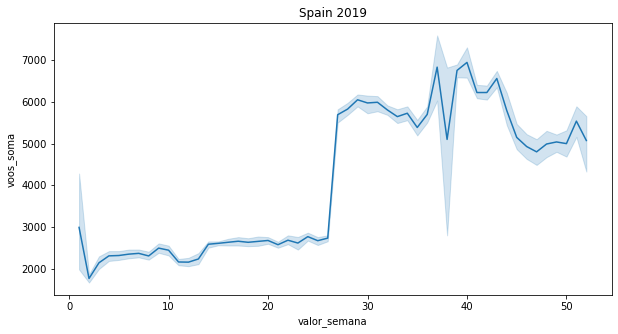

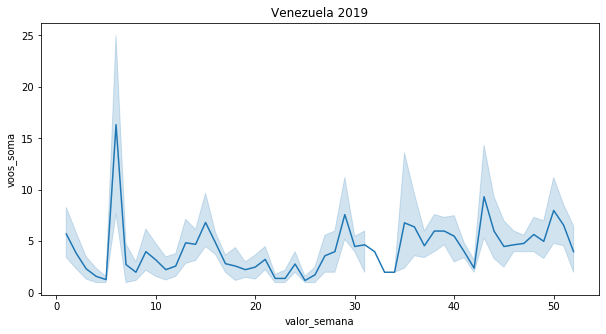

In [10]:
for c in countries:
    plots2019 = df_historical[(df_historical.pais == c) & (df_historical.year == 2019)]
    ax = sns.lineplot(y = plots2019.voos_soma, x= plots2019.valor_semana)
    plt.title(str(c) + ' 2019')
    plt.show()

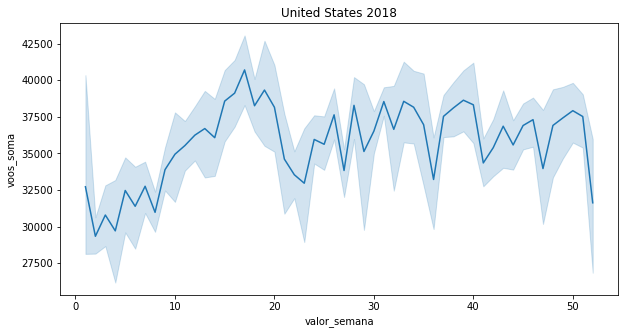

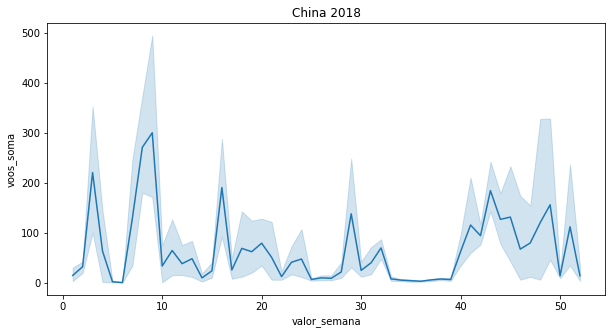

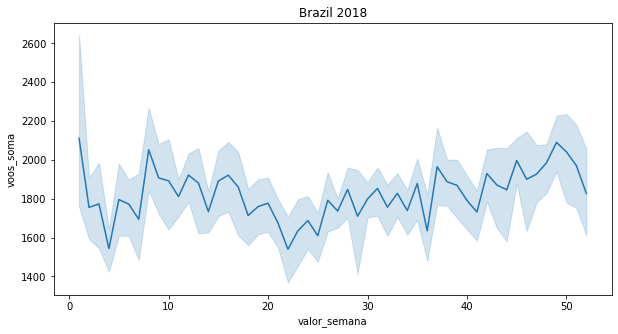

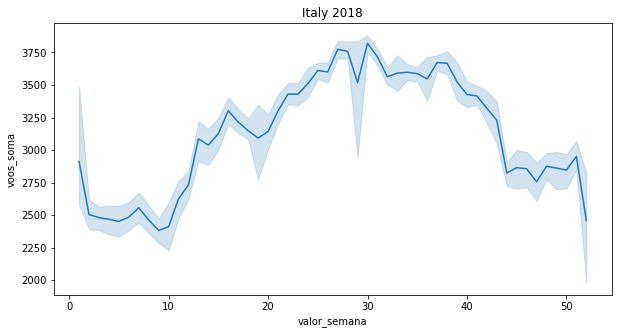

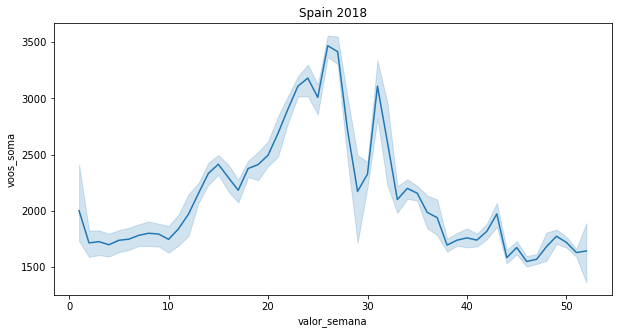

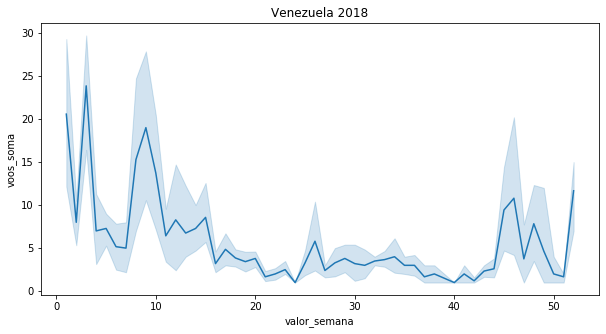

In [11]:
for c in countries:
    plots2018 = df_historical[(df_historical.pais == c) & (df_historical.year == 2018)]
    ax = sns.lineplot(y = plots2018.voos_soma, x= plots2018.valor_semana)
    plt.title(str(c) + ' 2018')
    plt.show()

<B> Problemas encontrados: </B>

Antes do primeiro semestre de 2019 os dados não estão tão corretos, podemos ver o crescimento neste período para todos os países que não ocorreu realmente

Existem países como a Venezuela que possuem pouquíssimos dados, haverá necessidade de tratá-los para evitar problemas futuros

In [12]:
df_soma_voos = df2020[['pais', 'voos_soma']].groupby(['pais']).sum().reset_index()

## Removing countries with small number of flights

In [13]:
df_tt_voos = df2020[['pais', 'voos_soma']].groupby(['pais']).sum().reset_index()
Q1 = np.quantile(df_tt_voos.voos_soma,0.4)
paises_ins = df_tt_voos[df_tt_voos.voos_soma > Q1].pais.unique()

df2020 = df2020[df2020.pais.isin(paises_ins)]

In [14]:
len(df2020.pais.unique())

71

In [15]:
paises_ins

array(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Bolivia', 'Brazil', 'Canada', 'China', 'Colombia', 'Costa Rica',
       'Croatia', 'Czech Republic', 'Denmark', 'Dominican Republic',
       'Estonia', 'Finland', 'France', 'French Polynesia', 'Germany',
       'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Latvia',
       'Luxembourg', 'Macau', 'Malaysia', 'Malta', 'Mexico', 'Morocco',
       'Netherlands', 'New Zealand', 'Norway', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Qatar', 'Romania', 'Russia',
       'Saudi Arabia', 'Senegal', 'Serbia', 'Singapore', 'Slovakia',
       'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Taiwan', 'Thailand', 'Turkey', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

## Getting january flights mean 

In [16]:
df_jan = df2020[(df2020.valor_semana >=1) & (df2020.valor_semana <=4)]
countries_jan = df_jan.pais.unique()

In [17]:
jan_mean = df_jan[['pais', 'voos_soma']].groupby(['pais']).mean().reset_index()
jan_mean = jan_mean.set_index('pais')
jan_mean = jan_mean.to_dict()

In [18]:
df_pred = df2020[df2020.valor_semana > 4]
df_pred['jan_mean'] = df2020['pais'].apply(lambda x: jan_mean['voos_soma'][x] if x in countries_jan else None)

C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
def pct_loss(x):
    return (x[4]-x[3])/x[4]

df_pred['pct_loss'] = df_pred.apply(pct_loss, axis=1)

C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [20]:
def get_date(df):
    return datetime.strptime('2020 ' +str(df[1]-1) + ' 6', "%Y %W %w")

df_pred['date'] = df_pred.apply(get_date, axis=1)

C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


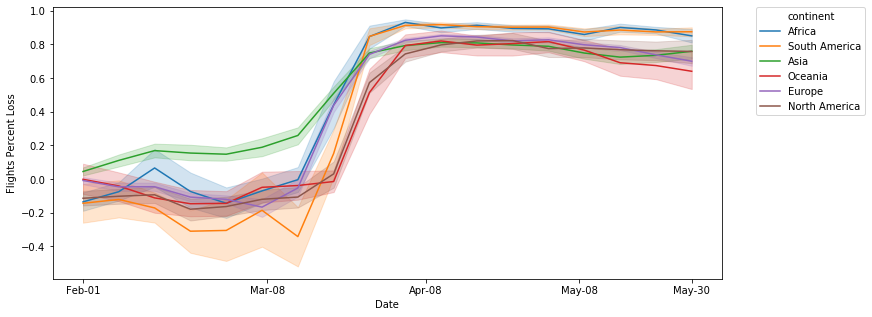

In [21]:
plt.figure(figsize=(12,5))
week = mdates.WeekdayLocator(interval=1)  # every year
months = mdates.MonthLocator()  # every month
month_fmt = mdates.DateFormatter('%b-%d')

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_pred['continent'] = df_pred['pais'].apply(lambda x: country_to_continent(x))
df_pred['date'] = pd.to_datetime(df_pred['date'])
ax = sns.lineplot(y = df_pred.pct_loss, x= df_pred.date, hue= df_pred.continent)

ax.set(xlabel = 'Date', ylabel = 'Flights Percent Loss')
ax.xaxis.set_major_locator(week)
ax.xaxis.set_major_formatter(month_fmt)
plt.xticks([min(df_pred.date),  pd.to_datetime('2020-03-08'), pd.to_datetime('2020-04-08'), pd.to_datetime('2020-05-08'), max(df_pred.date)])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("img/pctloss_continent.svg", format="svg")
plt.show()


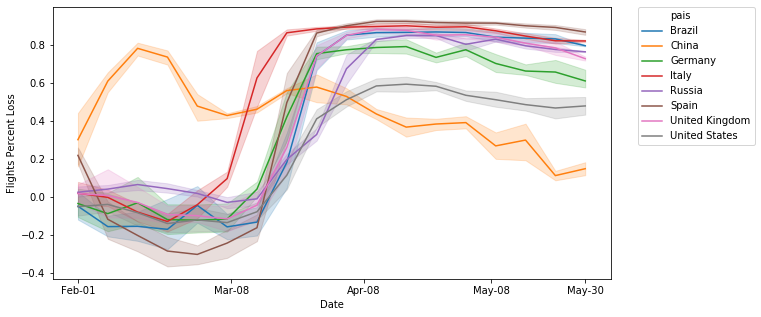

In [22]:
countries = ['Russia', 'Brazil', 'United Kingdom', 'Spain', 'China', 'Italy', 'Germany', 'United States']

countries_pct_loss = df_pred[df_pred.pais.isin(countries)]

ax = sns.lineplot(y = countries_pct_loss.pct_loss, x= countries_pct_loss.date, hue= countries_pct_loss.pais)
ax.xaxis.set_major_locator(week)
ax.xaxis.set_major_formatter(month_fmt)
plt.xticks([min(df_pred.date),  pd.to_datetime('2020-03-08'), pd.to_datetime('2020-04-08'), pd.to_datetime('2020-05-08'), max(df_pred.date)])
ax.set(xlabel = 'Date', ylabel = 'Flights Percent Loss')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig("img/pctloss_countries.svg", format="svg")
plt.show()

In [23]:
df_pred

,pais,valor_semana,dia_semana,voos_soma,jan_mean,pct_loss,date,continent
26,Algeria,5,0,117.0,130.076923,0.100532,2020-02-01,Africa
27,Algeria,5,1,174.0,130.076923,-0.337670,2020-02-01,Africa
28,Algeria,5,2,174.0,130.076923,-0.337670,2020-02-01,Africa
29,Algeria,5,3,177.0,130.076923,-0.360733,2020-02-01,Africa
30,Algeria,5,4,158.0,130.076923,-0.214666,2020-02-01,Africa
...,...,...,...,...,...,...,...,...
13493,Malta,14,5,1.0,109.769231,0.990890,2020-04-04,Europe
13518,Morocco,22,0,2.0,110.653846,0.981926,2020-05-30,Africa
13649,Singapore,19,6,6.0,1038.461538,0.994222,2020-05-09,Asia
13650,Slovakia,11,6,2.0,49.384615,0.959502,2020-03-14,Europe


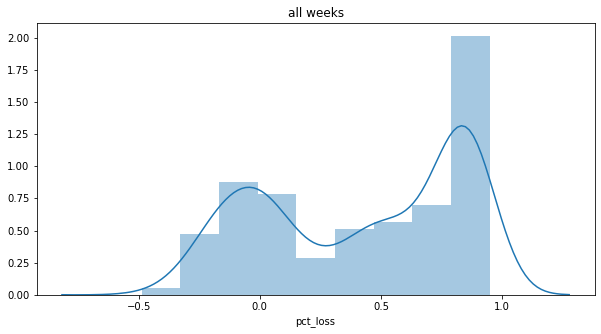

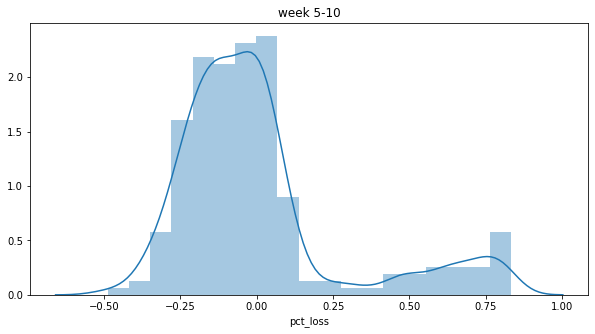

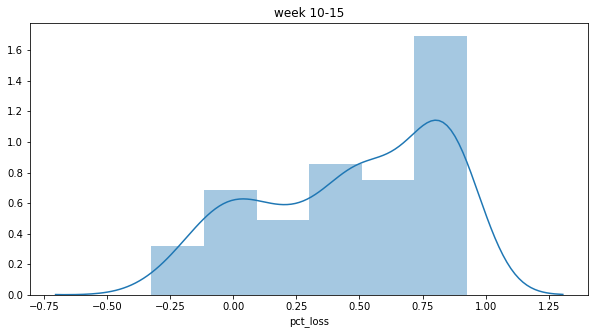

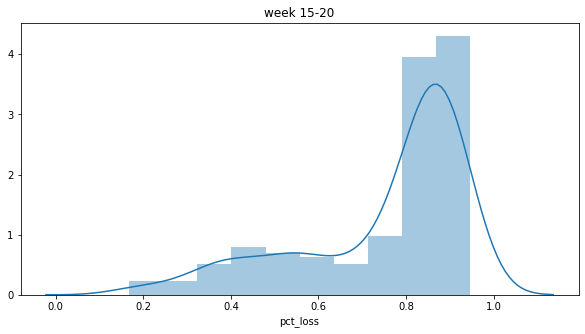

In [24]:
sns.distplot(countries_pct_loss.pct_loss)
plt.title('all weeks')
plt.show()

for i in range(5, 20, 5):
    sns.distplot(countries_pct_loss[(countries_pct_loss.valor_semana > i) & (countries_pct_loss.valor_semana < i+5)].pct_loss)
    plt.title('week ' + str(i) + '-' + str(i+5))
    plt.show()

In [25]:
def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df_pred['continent'] = df_pred['pais'].apply(lambda x: country_to_continent(x))

C:\Users\Victor\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


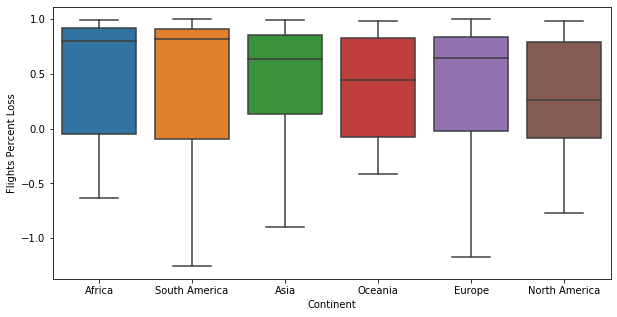

In [26]:
ax = sns.boxplot(x="continent", y="pct_loss", data=df_pred, showfliers = False)
#plt.title('week ' + str(i) + '-' + str(i+5))
ax.set(xlabel = 'Continent', ylabel = 'Flights Percent Loss')
plt.savefig("img/box_plot_allweeks.svg", format="svg")

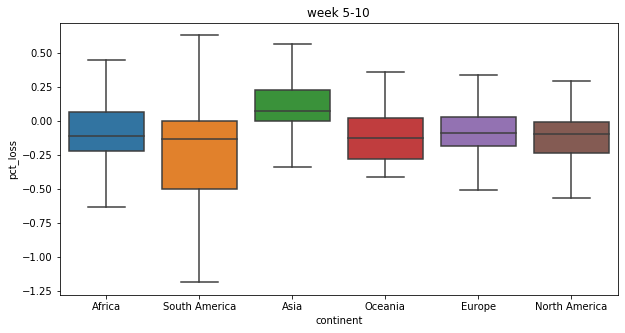

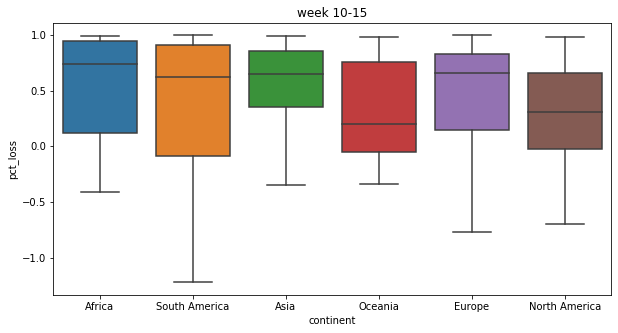

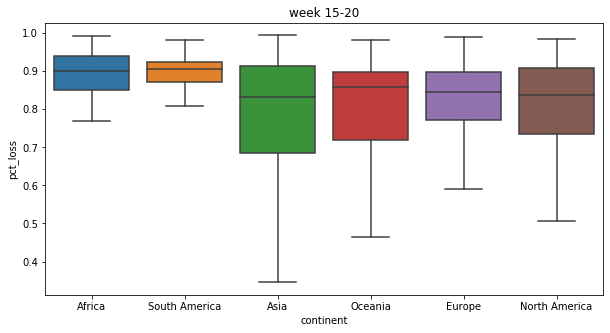

<Figure size 720x360 with 0 Axes>

In [27]:
for i in range(5, 20, 5):
    sns.boxplot(x="continent", y="pct_loss", data=df_pred[(df_pred.valor_semana > i) &(df_pred.valor_semana < i+5)], showfliers = False)
    plt.title('week ' + str(i) + '-' + str(i+5))
    plt.show()
plt.savefig("img/box_plot_week+"+str(i)+str(i+5)+".svg", format="svg")

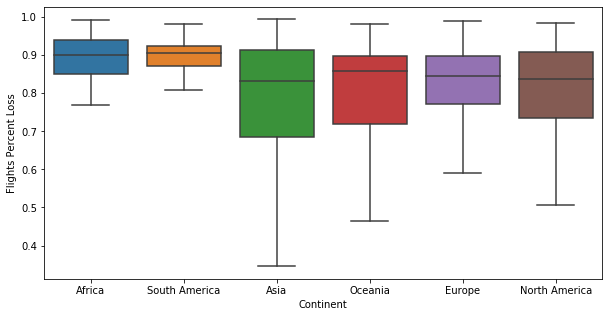

In [28]:
ax = sns.boxplot(x="continent", y="pct_loss", data=df_pred[(df_pred.valor_semana >= 16) &(df_pred.valor_semana <= 19)], showfliers = False)
ax.set(xlabel = 'Continent', ylabel = 'Flights Percent Loss')

plt.savefig("img/box_plot_2020-04-12_2020-05-10.svg", format="svg")
ax